In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import datasets
dataset = pd.read_csv('suicide_rate.csv')
X = pd.DataFrame(dataset.iloc[:, 12:])
y = dataset.iloc[:, 1].values

Text(0.5, 1.0, 'Suicide Rate 1990 - 2019')

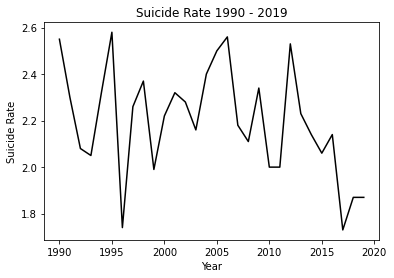

In [3]:
plt.plot(dataset["Year"],dataset["Suicide_Rate"],color='black')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate 1990 - 2019')

In [8]:
#Create labels for x axis
x_axis_labels = ["Unemployment Rate","Rainy Days","Bright Sunshine (hr)","Marriage Rate","Visual Arts Displays","Mobile Phone Sub","Divorce Rate","Library Loans", "Polytechnic Spending","University Spending","Vehicle Population","Newspaper Subscription","Road Accident","Electrical Consumption", "Suicide Rate"]

In [26]:
#Create correlation and mask
corrp = X.assign(target = y).corr().round(3)
mask = np.triu(np.ones_like(corrp, dtype=bool))

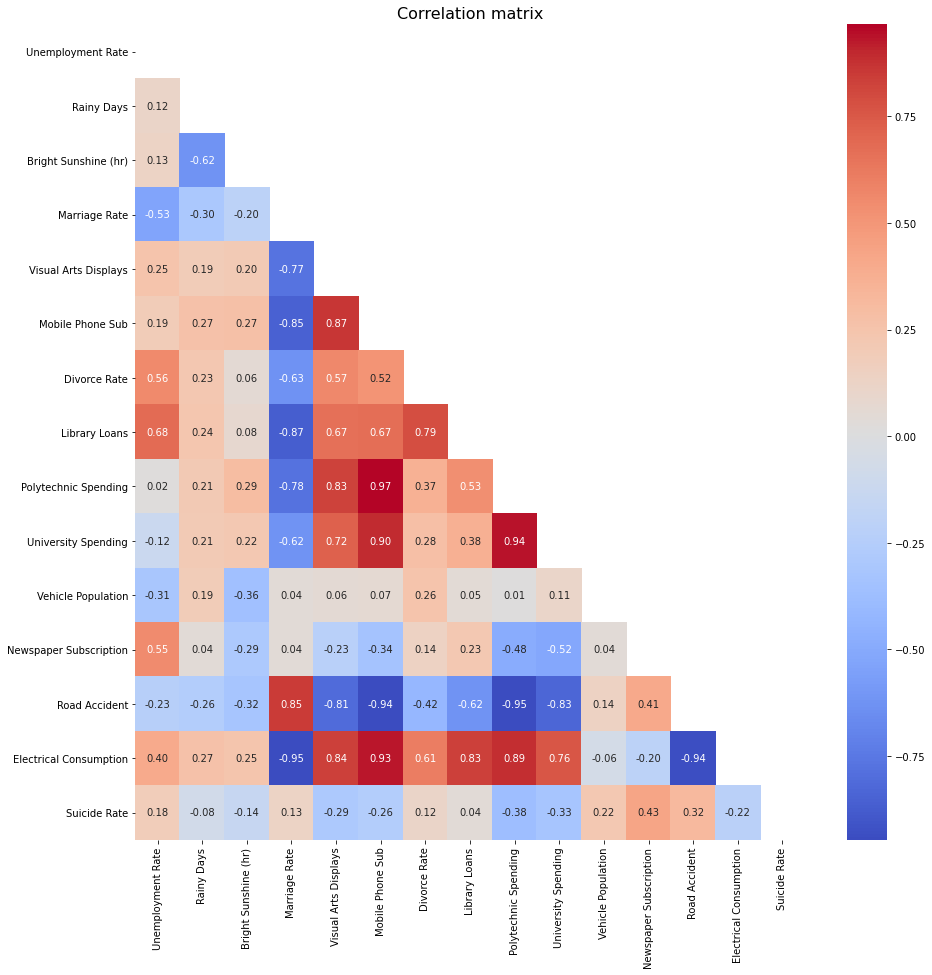

In [27]:
#Fix size of figure
plt.figure(figsize=(15,15))
#Plot the heatmap, using mask to create diagonal plot
sns.heatmap(corrp, mask=mask, cmap = 'coolwarm', annot = True, fmt=".2f", xticklabels=x_axis_labels, yticklabels=x_axis_labels).set_title('Correlation matrix', fontsize = 16)

plt.savefig('filename.png', facecolor='w', transparent=False)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score=True, max_features=0.33)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=0.33, n_estimators=1000, oob_score=True,
                      random_state=42)

In [73]:
print('R^2 Score: {:.2f} \nR^2 OOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(regressor.score(X_train, y_train), 
                                                                                    regressor.oob_score_,
                                                                                    regressor.score(X_test, y_test)))

R^2 Score: 0.80 
R^2 OOB Score: -0.54 
R^2 Validation Score: 0.36


In [74]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [83]:
fe_imp = imp_df(X_train.columns, regressor.feature_importances_)
fe_imp

,feature,feature_importance
0,Poly_Spend,0.106947
1,VA_Rate,0.095071
2,Uni_Spend,0.090137
3,NewsP_Rate,0.080500
4,Veh_Pop_Rate,0.078095
5,Elec_Cons_Rate,0.073636
6,Unemploy_Rate,0.067184
7,Divorce_Rate,0.065608
8,LBSub_Rate,0.061628
9,Hours_Bright_Sunshine,0.060386


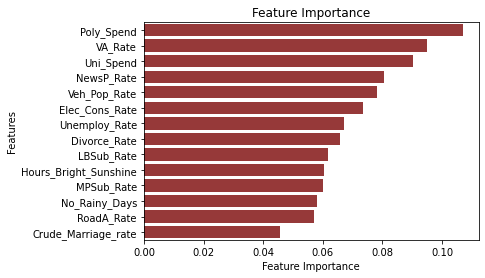

In [88]:
fe_imp.columns = ['feature', 'feature_importance']
# plt.figure(figsize=(15,15))
ax = sns.barplot(x = 'feature_importance', y = 'feature', data = fe_imp, orient = 'h', color = 'brown')
ax.set(xlabel="Feature Importance",ylabel="Features",title="Feature Importance")
plt.savefig('filenamee.png', facecolor='w', transparent=False)

In [55]:
import statsmodels.api as sm
T = sm.add_constant(X_train)
model = sm.OLS(y_train, T).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                    0.8329
Date:                Tue, 03 Nov 2020   Prob (F-statistic):              0.636
Time:                        17:04:05   Log-Likelihood:                 12.780
No. Observations:                  22   AIC:                             4.440
Df Residuals:                       7   BIC:                             20.81
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.95

In [90]:
from sklearn import metrics
Z = sm.add_constant(X_valid)
y_pred = model.predict(Z)
print("MAE: %.2f" % metrics.mean_absolute_error(y_valid, y_pred))
print("MSE: %.2f" % metrics.mean_squared_error(y_valid, y_pred))
print("MSE: %.2f" % np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 0.26
MSE: 0.12
MSE: 0.35
